<a href="https://colab.research.google.com/github/lk480/IIB_Project/blob/main/STIV_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Install necessary packages
!pip install keras_cv
import os
import tensorflow as tf
import matplotlib.pyplot as plt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 803.1/803.1 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 950.8/950.8 kB 18.8 MB/s eta 0:00:00


In [ ]:
import random
training_data_dir = '/content/drive/MyDrive/train_stiv_fft'
data_filenames = os.listdir(training_data_dir)
training_data_filenames = data_filenames[:2980]
training_labels = []


#Randomly Shuffle Training & Test Data
random.shuffle(training_data_filenames)


import re
for filename in training_data_filenames:
  match = re.search(r"stiv_fft_([\d.]+)_", filename)
  number = match.group(1)
  training_labels.append(str(number))



#Find the number of unique classes
set_of_classes = set(training_labels)
assert len(set_of_classes) == 30

#Convert to one-hot-encoded labels
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np

# Step 1: Label Encoding
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(training_labels)

# Step 2: One-Hot Encoding
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)



/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


/content/drive/MyDrive/train_stiv_fft/stiv_fft_117_41.jpg
(256, 256, 1)


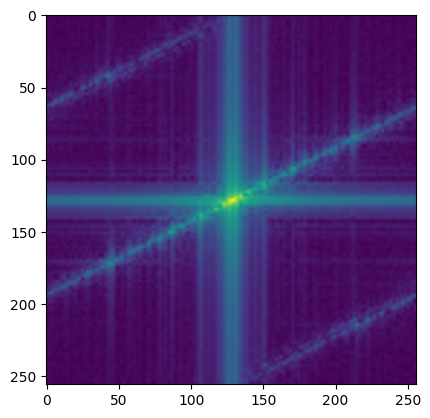

In [ ]:
def create_paths(filenames, directory):
  file_paths = [os.path.join(directory, filename) for filename in filenames]
  return file_paths

training_data_paths = create_paths(training_data_filenames, training_data_dir)

def load_fft(image_path, size=(256,256)):
  image = tf.io.read_file(image_path)
  image = tf.image.decode_png(image, 1)
  image = tf.image.resize(image, size)
  image = tf.cast(image, tf.float32) / 255.0
  return image

index = 2900
final = load_fft(training_data_paths[index])
print(training_data_paths[index])

final_fft_array = final.numpy()
plt.imshow(final_fft_array)
print(np.shape(final_fft_array))

In [ ]:
print(training_data_paths)

['/content/drive/MyDrive/train_stiv_fft/stiv_fft_96_14.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_99_4.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_97_46.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_118_73.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_113_96.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_106_55.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_117_6.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_110_59.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_117_24.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_108_15.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_99_24.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_105_64.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_95_34.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_95_81.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_105_34.jpg', '/content/drive/MyDrive/train_stiv_fft/stiv_fft_93_91.jpg', '/content/drive/MyDrive/train_st

In [ ]:
print(training_labels)

['93', '96', '119', '97', '99', '94', '112', '111', '94', '106', '118', '104', '116', '106', '109', '90', '114', '91', '101', '115', '102', '117', '119', '111', '100', '101', '107', '107', '113', '104', '95', '102', '110', '104', '101', '119', '119', '92', '93', '119', '93', '111', '98', '102', '117', '113', '91', '95', '104', '102', '115', '93', '95', '103', '93', '110', '103', '90', '100', '104', '115', '92', '100', '110', '113', '103', '119', '95', '114', '104', '103', '114', '99', '112', '112', '118', '107', '95', '109', '114', '103', '96', '105', '110', '111', '109', '94', '91', '100', '104', '98', '117', '119', '112', '106', '113', '97', '90', '119', '109', '93', '100', '115', '95', '90', '113', '117', '101', '108', '114', '96', '105', '112', '113', '118', '108', '101', '91', '100', '106', '95', '91', '107', '119', '111', '95', '114', '96', '97', '117', '90', '110', '95', '110', '112', '91', '97', '92', '113', '102', '112', '96', '117', '102', '104', '105', '108', '106', '109', '

In [ ]:
#Sample Training Images to check accuracy
val_data_filenames = data_filenames[2981:]
val_data_paths = training_data_paths = create_paths(val_data_filenames, training_data_dir)
val_labels = []
for filename in val_data_paths:
  match = re.search(r"stiv_fft_([\d.]+)_", filename)
  number = match.group(1)
  val_labels.append(str(number))
print(val_labels)

['99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99']


In [ ]:
x_train_tensor = tf.data.Dataset.from_tensor_slices(training_data_paths)
x_train = x_train_tensor.map(load_fft)
y_train = tf.data.Dataset.from_tensor_slices(onehot_encoded)
training_data = tf.data.Dataset.zip(x_train, y_train)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, GlobalAveragePooling2D, LeakyReLU, Dense, Flatten
from keras_cv.layers import DropBlock2D
from keras.models import Model


def STIV_CNN(input_size=(256,256,1), kernel_init='he_normal', drop_rate=0.1, block_size=7):
  inputs = Input(input_size)
  conv1 = Conv2D(32, kernel_size=(7,7), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(inputs)
  conv2 = Conv2D(32, kernel_size=(5,5), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(conv1)
  pool1 = MaxPooling2D((2,2))(conv2)
  dropblock1 = DropBlock2D(drop_rate, block_size)(pool1)

  conv3 = Conv2D(64, kernel_size=(5,5), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(dropblock1)
  conv4 = Conv2D(64, kernel_size=(3,3), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(conv3)
  pool2 = MaxPooling2D((2,2))(conv4)
  dropblock2 = DropBlock2D(drop_rate, block_size)(pool2)

  conv5 = Conv2D(128, kernel_size=(5,5), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(dropblock2)
  conv6 = Conv2D(128, kernel_size=(3,3), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(conv5)
  pool3 = MaxPooling2D((2,2))(conv6)
  dropblock3 = DropBlock2D(drop_rate, block_size)(pool3)

  conv7 = Conv2D(512, kernel_size=(5,5), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(dropblock3)
  conv8 = Conv2D(512, kernel_size=(3,3), activation=LeakyReLU(alpha=0.3), kernel_initializer=kernel_init)(conv7)
  global_avg_pool = GlobalAveragePooling2D()(conv8)

  flatten = Flatten()(global_avg_pool)
  out_layer = Dense(30, activation ='softmax', kernel_initializer=kernel_init)(flatten)

  return Model(inputs=[inputs], outputs=[out_layer])

Using TensorFlow backend


In [ ]:
from keras.optimizers import Adam
tf.config.run_functions_eagerly(True)
model = STIV_CNN()
model.compile(optimizer= Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['categorical_accuracy'])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 1)]     0         
                                                                 
 conv2d (Conv2D)             (None, 250, 250, 32)      1600      
                                                                 
 conv2d_1 (Conv2D)           (None, 246, 246, 32)      25632     
                                                                 
 max_pooling2d (MaxPooling2  (None, 123, 123, 32)      0         
 D)                                                              
                                                                 
 drop_block2d (DropBlock2D)  (None, 123, 123, 32)      0         
                                                                 
 conv2d_2 (Conv2D)           (None, 119, 119, 64)      51264     
                                                             

In [ ]:
#Define Custom Callbacks
from tensorflow.keras.callbacks import ReduceLROnPlateau
reduce_lr = ReduceLROnPlateau(monitor = 'categorical_accuracy',
                              factor = 0.5,
                              patience = 8,
                              min_lr = 1e-5,
                              verbose = 1)

In [ ]:
#Batch Data
batch_size = 32
train_data = training_data.batch(batch_size)
train_hist = model.fit(train_data, epochs=30, callbacks=[reduce_lr])

Epoch 1/30
1/1 [==============================] - 13s 13s/step - loss: 3.4860 - categorical_accuracy: 0.0000e+00 - lr: 1.0000e-04
Epoch 2/30
1/1 [==============================] - 0s 118ms/step - loss: 3.1033 - categorical_accuracy: 0.1053 - lr: 1.0000e-04
Epoch 3/30
1/1 [==============================] - 0s 116ms/step - loss: 2.9773 - categorical_accuracy: 0.1053 - lr: 1.0000e-04
Epoch 4/30
1/1 [==============================] - 0s 117ms/step - loss: 2.8738 - categorical_accuracy: 0.1053 - lr: 1.0000e-04
Epoch 5/30
1/1 [==============================] - 0s 116ms/step - loss: 2.8382 - categorical_accuracy: 0.0526 - lr: 1.0000e-04
Epoch 6/30
1/1 [==============================] - 0s 116ms/step - loss: 2.8075 - categorical_accuracy: 0.0526 - lr: 1.0000e-04
Epoch 7/30
1/1 [==============================] - 0s 114ms/step - loss: 2.7883 - categorical_accuracy: 0.1579 - lr: 1.0000e-04
Epoch 8/30
1/1 [==============================] - 0s 114ms/step - loss: 2.8427 - categorical_accuracy: 0.052

KeyboardInterrupt: ignored

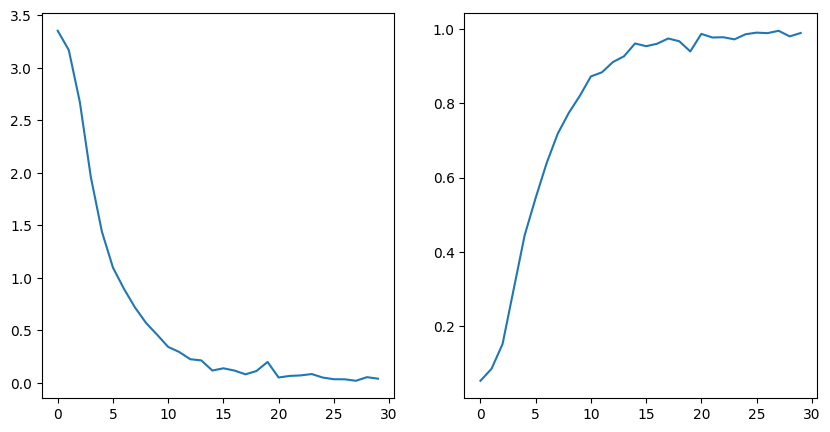

In [ ]:
#Training Curves
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
ax1.plot(train_hist.history['loss'], '-', label = 'Loss')
ax2.plot(train_hist.history['categorical_accuracy'], label='Accuracy')

In [ ]:
#Sample Training Images to check accuracy
val_data_filenames = data_filenames[2981:]
val_data_paths = training_data_paths = create_paths(val_data_filenames, training_data_dir)
val_labels = []
for filename in val_data_paths:
  match = re.search(r"stiv_fft_([\d.]+)_", filename)
  number = match.group(1)
  val_labels.append(str(number))

val_dataset = tf.data.Dataset.from_tensor_slices(val_data_paths)
val_dataset = val_dataset.map(load_fft)
val_data_batched = val_dataset.batch(batch_size)
predictions = model.predict(val_data_batched)

/usr/local/lib/python3.10/dist-packages/tensorflow/python/data/ops/structured_function.py:265: UserWarning: Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.
  warnings.warn(


1/1 [==============================] - 1s 728ms/step


In [ ]:
#Reverse One-Hot Encoding
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Convert one-hot predictions to integer labels
integer_predictions = np.argmax(predictions, axis=1)

# Convert integer labels back to original labels
original_labels_predictions = label_encoder.inverse_transform(integer_predictions)
print(original_labels_predictions)

['99' '99' '99' '99' '99' '99' '99' '99' '99' '99' '99' '99' '99' '99'
 '99' '99' '99' '99' '99']


In [ ]:
print(val_labels)

['99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99', '99']
